Gad2	GCaMP7s
171	VISal



source//allen/programs/mindscope/production/learning/prod0/specimen_1179706244/ophys_session_1189276987/ophys_experiment_1189514812
/allen/programs/mindscope/workgroups/learning/mattd/co_dev/data

raw: /allen/programs/mindscope/workgroups/learning/mattd/co_dev/data/1189276987/raw
processed: /allen/programs/mindscope/workgroups/learning/mattd/co_dev/data/1189276987/processed/1189514802

processed
7e6369ef-ed60-4f11-b7f8-f363eb628633
raw
ff7bda54-924e-444c-93fd-0b01766f2080

In [12]:
# autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import matplotlib.pyplot as plt

from ophys.ophys_plane_dataset import OphysPlaneDataset

In [14]:
from ophys.grab_ophys_outputs import GrabOphysOutputs as GOO
goo = GOO("/allen/programs/mindscope/workgroups/learning/mattd/co_dev/data/1098444819")
goo

In [16]:
goo2 = GOO(oeid=1098444819, data_path="/allen/programs/mindscope/workgroups/learning/mattd/co_dev/data")
goo2

In [41]:
processed_path = "/allen/programs/mindscope/workgroups/learning/mattd/co_dev/data/1299958728/processed/1299958728" # give experiment
raw_path = "/allen/programs/mindscope/workgroups/learning/mattd/co_dev/data/1299958728/raw"

#dataset = OphysDataset("/allen/programs/mindscope/workgroups/learning/mattd/co_dev/data/1098444819")
dataset = OphysPlaneDataset(processed_path, raw_path)

dataset.dff_traces

Currently sync file stored in raw data assest, will load since raw_folder_path is provided (02/01/2024)


,dff,baseline,noise,skewness
cell_specimen_id,,,,
0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN
1,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN
10,"[0.2590196997004517, 0.18960400179453218, 0.24...","[2418.167761571288, 2418.167761571288, 2418.16...",162.071484,0.322384
11,"[0.14345842641369522, 0.26765181864374543, 0.1...","[1332.4583180076627, 1332.4583180076627, 1332....",112.761395,0.755166
12,"[0.17683583095468602, 0.10960230885661967, 0.1...","[1722.1217291917526, 1722.1217291917526, 1722....",104.438841,0.597191
...,...,...,...,...
78,"[0.22188464416922554, 0.198864316383394, 0.174...","[1348.4292018823528, 1348.816582117647, 1348.4...",262.590612,0.351564
79,"[-0.16801624232420329, -0.09458193923232106, 0...","[1142.6892315256105, 1142.6892315256105, 1142....",223.650668,0.342916
8,"[0.33118886469094383, 0.11138697404849598, 0.3...","[1377.131721038961, 1377.131721038961, 1377.13...",127.592855,1.859951


In [33]:
dataset.neuropil_traces.iloc[0].neuropil_fluorescence_traces.shape

(142859,)

In [40]:
# load dff, ['baseline', 'data', 'noise', 'roi_names', 'skewness']
fp = dataset.file_paths["dff_h5"]

import h5py
with h5py.File(fp, 'r') as f:
    print(f["skewness"][:].shape)

(81,)


<xarray.DataArray 'RMSE' ()>
array(0.00506034)
Coordinates:
    cell_roi_id  int64 2

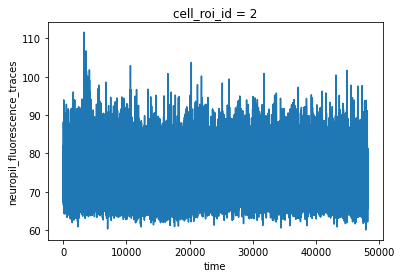

In [98]:
import xarray as xr
dataset = OphysDataset("/allen/programs/mindscope/workgroups/learning/mattd/co_dev/data/1098444819")
x = dataset.neuropil_traces_xr

# get cell_roi_id 0 from x 
cell_roi_id = 1
x.sel(cell_roi_id=cell_roi_id).neuropil_fluorescence_traces.plot.line()
x.sel(cell_roi_id=cell_roi_id).RMSE


In [48]:
dataset = OphysDataset("/allen/programs/mindscope/workgroups/learning/mattd/co_dev/data/1098444819")
dataset.cell_specimen_table.head()

,x,y,width,height,mask_matrix,valid_roi,mask_image_plane,exclusion_labels,cell_roi_id,max_correction_up,max_correction_down,max_correction_left,max_correction_right
cell_specimen_id,,,,,,,,,,,,,
0,44,0,6,6,"[[False, True, True, True, False, False], [Tru...",False,0,[small_size],0,0,0,0,0
1,79,12,14,17,"[[False, False, False, False, False, False, Tr...",True,0,[],1,0,0,0,0
2,206,49,20,11,"[[False, False, False, False, False, False, Fa...",True,0,[],2,0,0,0,0
3,344,58,12,11,"[[False, True, True, True, True, False, False,...",True,0,[],3,0,0,0,0
4,53,66,15,13,"[[False, False, False, False, False, False, Fa...",True,0,[],4,0,0,0,0
